In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [57]:
espressini_facciali = []
tipi_espressioni = []
tipologia = ["Angry","Disgust","Fear","Happy","Sad","Surprise","Neutral"]
with open("./emotion.csv","r") as f:
    righe = f.readlines()
for riga in righe[1:]:
    riga = riga[:-1].split(",")
    
    faccia = riga[1].split(" ")
    array = np.array(faccia,dtype=np.int32)
    espressini_facciali.append(np.reshape(array,(48,48)))
    tipi_espressioni.append(int(riga[0]))
espressini_facciali

[array([[ 70,  80,  82, ...,  52,  43,  41],
        [ 65,  61,  58, ...,  56,  52,  44],
        [ 50,  43,  54, ...,  49,  56,  47],
        ...,
        [ 91,  65,  42, ...,  72,  56,  43],
        [ 77,  82,  79, ..., 105,  70,  46],
        [ 77,  72,  84, ..., 106, 109,  82]]),
 array([[151, 150, 147, ..., 129, 140, 120],
        [151, 149, 149, ..., 122, 141, 137],
        [151, 151, 156, ..., 109, 123, 146],
        ...,
        [188, 188, 121, ..., 185, 185, 186],
        [188, 187, 196, ..., 186, 182, 187],
        [186, 184, 185, ..., 193, 183, 184]]),
 array([[231, 212, 156, ...,  44,  27,  16],
        [229, 175, 148, ...,  27,  35,  27],
        [214, 156, 157, ...,  28,  22,  28],
        ...,
        [241, 245, 250, ...,  57, 101, 146],
        [246, 250, 252, ...,  78, 105, 162],
        [250, 251, 250, ...,  88, 110, 152]]),
 array([[ 24,  32,  36, ..., 173, 172, 173],
        [ 25,  34,  29, ..., 173, 172, 173],
        [ 26,  29,  25, ..., 172, 172, 174],
        ..

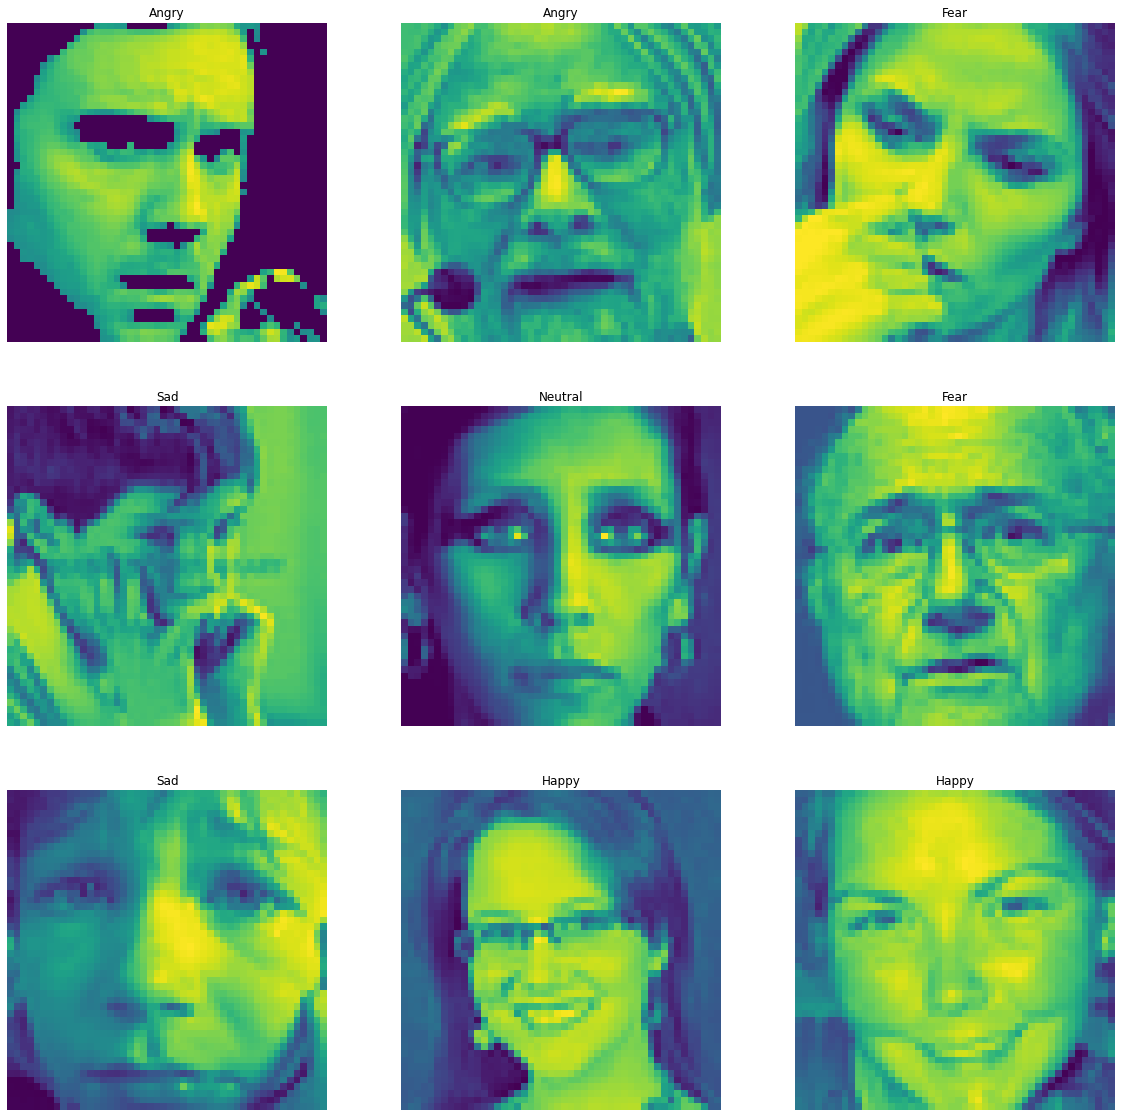

In [94]:
nrows = 3
ncols = 3
fig, axs = plt.subplots(nrows=nrows,ncols=ncols,figsize=(20,20))
c = 0
for i in range(0,nrows):
    for j in range(0,ncols):
        axs[i,j].set_title(f"{tipologia[tipi_espressioni[c]]}")
        axs[i,j].imshow(espressini_facciali[c])
        axs[i,j].axis('off')
        c += 1
plt.show()

In [82]:
img = np.reshape(espressini_facciali[0],48*48)
img

array([ 70,  80,  82, ..., 106, 109,  82])

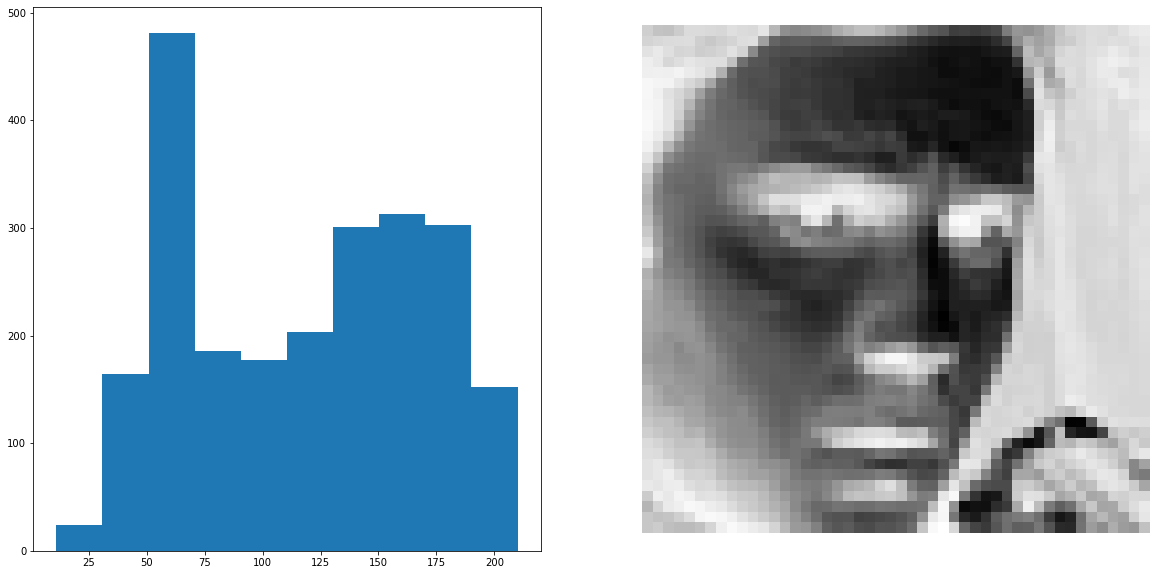

In [83]:
fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(20,10))
axs[0].hist(img)
axs[1].imshow(espressini_facciali[0],cmap="Greys")
axs[1].axis("off")
plt.show()

In [89]:
img[img < 100] = 0

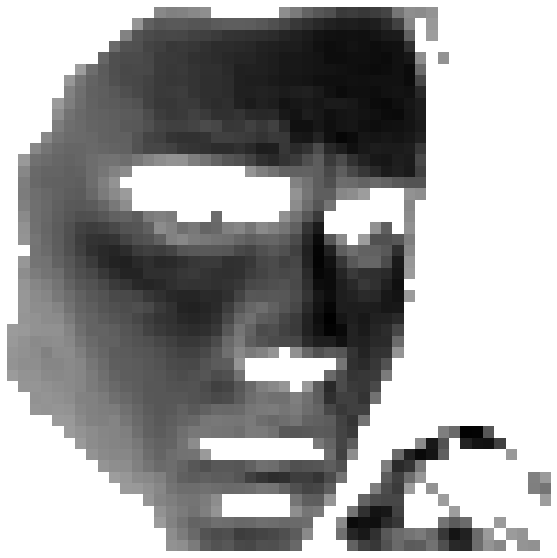

In [91]:
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(np.reshape(img,(48,48)),cmap="Greys")
ax.axis("off")
plt.show()

# Esercizio 2

In [2]:
n_days = 200
np.random.seed(121)
prezzo_gionaliero = 100. + np.cumsum(np.random.normal(0.1,1.0,n_days))

In [3]:
indici_massimi_locali = np.logical_and(prezzo_gionaliero > np.roll(prezzo_gionaliero,-1),
                                prezzo_gionaliero > np.roll(prezzo_gionaliero,1))
prezzo_gionaliero[indici_massimi_locali]

array([104.75001192, 104.02489768, 105.43729698, 102.43313549,
       105.53524404, 105.5813093 , 103.76159458, 106.80353327,
       104.47360972, 103.67570863, 103.79890934, 109.30027182,
       107.76095024, 108.15587917, 105.44094125, 105.0580952 ,
       102.98912962, 104.81278529, 106.62047007, 107.26521704,
       111.46737164, 112.62178669, 113.73520037, 113.12464481,
       113.02472917, 113.29256503, 112.26934879, 112.7553739 ,
       113.27211283, 112.85475964, 113.95583421, 115.63582669,
       114.54327183, 117.02383199, 116.00547765, 116.33477617,
       123.71625187, 125.02609578, 127.45429127, 126.75122724,
       127.62894555, 126.64060173, 128.56112348, 126.13883116,
       123.4302339 , 125.05560391, 127.65975231])

In [4]:
indici_minimi_locali = np.logical_and(prezzo_gionaliero < np.roll(prezzo_gionaliero,-1),
                                prezzo_gionaliero < np.roll(prezzo_gionaliero,1))
prezzo_gionaliero[indici_minimi_locali]

array([ 98.65871873, 103.52302456, 103.93347102, 102.24539167,
       102.03284949, 102.54851944, 102.6875433 , 103.63507309,
       104.45942679, 101.24823498, 102.40291902, 102.16058753,
       106.12272855, 107.20528186, 104.52951183, 104.65072118,
       102.88639147, 102.94651346, 104.14184196, 106.10056237,
       107.23003725, 109.85115214, 111.31043309, 112.70261878,
       111.93398159, 111.67864805, 111.63405726, 111.61653691,
       111.86082103, 111.78761176, 112.76886486, 112.24066882,
       114.18997774, 113.25370627, 115.15291469, 115.29077505,
       115.95804329, 122.60400625, 124.25399182, 126.60484687,
       126.71409272, 125.4448232 , 126.21383726, 125.89525175,
       121.27379582, 123.18260925, 123.63429703])

In [5]:
n_prezzi_maggiori_di_105 = np.sum(prezzo_gionaliero > 105)
n_prezzi_maggiori_di_105

143

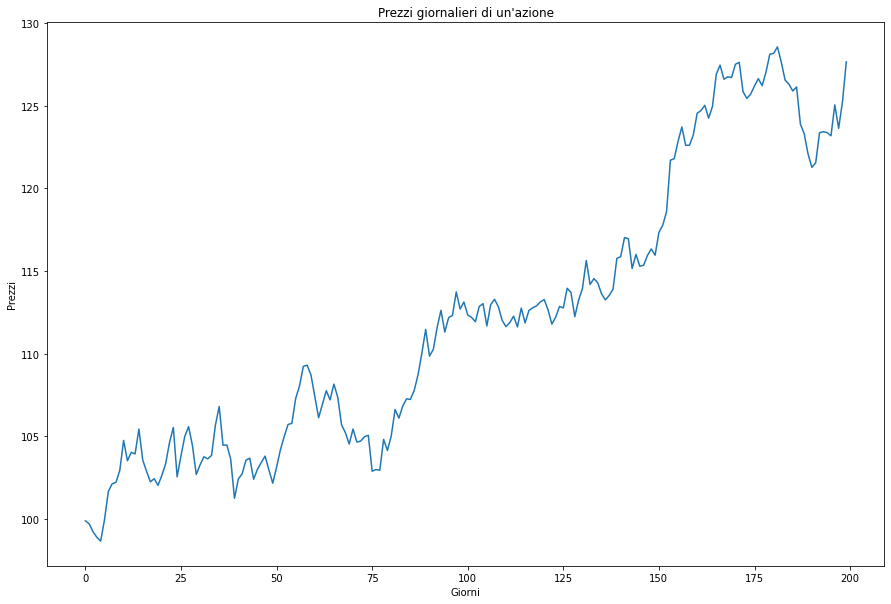

In [6]:
fig, ax = plt.subplots(figsize=(15,10))
ax.set_title("Prezzi giornalieri di un'azione")
ax.plot(prezzo_gionaliero)
ax.set_xlabel("Giorni")
ax.set_ylabel("Prezzi")
plt.show()

In [7]:
variazioni_di_prezzo = prezzo_gionaliero - np.roll(prezzo_gionaliero,-1)
giorno_con_variazione_maggiore = prezzo_gionaliero - np.roll(prezzo_gionaliero,-1) == np.max(variazioni_di_prezzo)
giorno = np.where(giorno_con_variazione_maggiore)
giorno

(array([199], dtype=int64),)

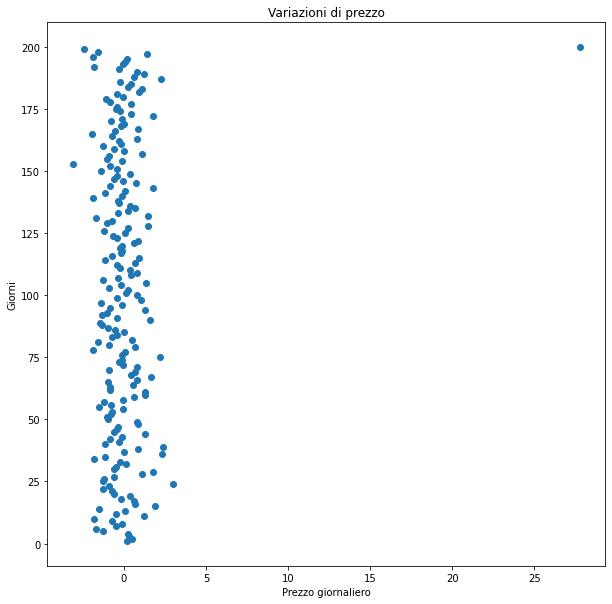

In [8]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_title("Variazioni di prezzo")
ax.scatter(variazioni_di_prezzo,np.arange(1,201))
ax.set_xlabel("Prezzo giornaliero")
ax.set_ylabel("Giorni")
plt.show()

# Esercizio 3

In [9]:
x = np.linspace(-3.,3.,100)
f1 = np.exp(-x**2)
f2 = np.exp(-x**2)*np.sin(20*x)
f3 = np.exp(-x**2)*np.cos(20*x)
f4 = np.sin(20*x)/20*x
funzioni = [f1,f2,f3,f4]
colori = ["Green","Red","Blue","Grey"]
labels = ["exp(-x**2)","exp(-x**2)*sin(20*x)","exp(-x**2)*cos(20*x)","sin(20*x)/20*x"]

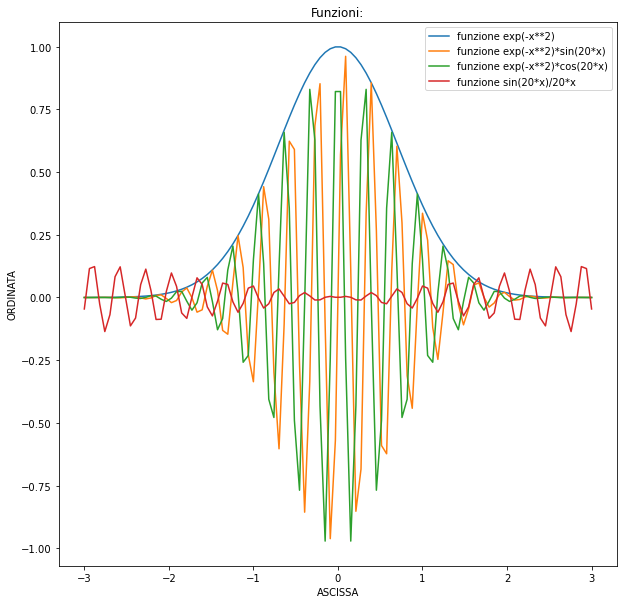

In [10]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_title("Funzioni:")
for funzione,colore,label in zip(funzioni,colori,labels):
    ax.plot(x,funzione,label = f"funzione {label}")
ax.set_xlabel("ASCISSA")
ax.set_ylabel("ORDINATA")
ax.legend()
plt.show()